In [1]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud, ImageColorGenerator
from PIL.Image import core as _imaging
import matplotlib.pyplot as plt
from datetime import datetime
from PIL import Image

In [2]:
our_data = pd.read_json('https://raw.githubusercontent.com/ajakaiye33/ngrnewscorpus/main/data/testy.jsonl',lines=True)

In [3]:
pd.set_option("display.max_rows",2000)

In [4]:
our_data

,title,text,summary,link,published,scraped_date,keywords
0,"Nigeria’ll collapse in 6 months time, Robert C...",Kindly Share This Story:\n\nVictor Ogunyinka\n...,Kindly Share This Story:Victor OgunyinkaSenior...,https://www.vanguardngr.com/2021/05/nigeriall-...,05/03/2021,05/04/2021,"[robert, clarke, political, leaders, nigeriall..."
1,Nigerian govt extends NIN-SIM registration til...,Nigerian government has extended the ongoing n...,Nigerian government has extended the ongoing n...,https://dailypost.ng/2021/05/04/nigerian-govt-...,05/04/2021,05/04/2021,"[nigerian, statement, govt, nigerians, extensi..."
2,"Bill Gates’s daughter, Jennifer laments parent...",Following the news of Bill and Melinda Gates d...,Following the news of Bill and Melinda Gates d...,https://dailypost.ng/2021/05/04/bill-gatess-da...,05/04/2021,05/04/2021,"[support, gatess, daughter, jennifer, laments,..."
3,"How Bill, Melinda Gates met, married, divorced...",By Alao Abiodun\n\nThe news of Bill Gates and ...,By Alao AbiodunThe news of Bill Gates and his ...,https://thenationonlineng.net/how-bill-melinda...,05/04/2021,05/04/2021,"[world, married, microsoft, foundation, 27, co..."
4,BREAKING: FG again extends NIN deadline by 8 w...,"From Benjamin Babine, Abuja\n\nThe Federal Gov...","From Benjamin Babine, AbujaThe Federal Governm...",https://www.sunnewsonline.com/breaking-fg-agai...,05/04/2021,05/04/2021,"[fg, citizens, breaking, communications, commi..."
5,"Jonathan advocates media freedom, responsible ...",Goodluck Jonathan Foundation (GJF) has called ...,Goodluck Jonathan Foundation (GJF) has called ...,https://www.sunnewsonline.com/jonathan-advocat...,05/04/2021,05/04/2021,"[journalists, jonathan, responsible, press, fo..."
6,"FG Extends NIN-SIM Linkage to June 30, as Enro...",By Emma Okonji\n\nThe federal government has a...,By Emma OkonjiThe federal government has appro...,https://www.thisdaylive.com/index.php/2021/05/...,05/04/2021,05/04/2021,"[54m, ncc, fg, enrolment, national, statement,..."
7,"FG Moves to Curb Small Arms Influx, Establishe...",•Bauchi raises the alarm over Boko Haram threa...,It established the National Centre for the Con...,https://www.thisdaylive.com/index.php/2021/05/...,05/04/2021,05/04/2021,"[state, influx, weapons, fg, curb, national, s..."
8,#MySARSStory: Out of Nowhere,"A policeman, for no reason, opened fire on God...","Godwin UdohAs we drove nearer, one of them bro...",http://saharareporters.com/2021/05/04/mysarsst...,05/04/2021,05/04/2021,"[mysarsstory, hospital, command, family, wife,..."
9,#MySARSStory: Out of Nowhere,"A policeman, for no reason, opened fire on God...","Godwin UdohAs we drove nearer, one of them bro...",http://saharareporters.com/2021/05/04/mysarsst...,05/04/2021,05/04/2021,"[mysarsstory, hospital, command, family, wife,..."


In [5]:
today = datetime.now()


In [6]:
def todays_headline(df,col):
    get_date = today.strftime("%m/%d/%Y")
    filter_today = df[col] == get_date
    filter_keyword = df.iloc[:,0]
    show_keywords_today = filter_keyword[filter_today].unique()
    return show_keywords_today

In [7]:
todays_headline(our_data,'scraped_date')

array(['Amotekun evicts another 137 northerners from Ondo forest',
       'FEC approves N6.2bn for execution of power projects',
       'Delta govt committed to sustainable tourism devt ― Commissioner',
       'Man in police net over gun possession, threat to life',
       'Arms purchase probe: Reps sack committee, 11 others',
       'Sponsors of attacks in Imo, Nigeria will be exposed',
       'Buhari happy about release College of Forestry students, begs for others in captivity',
       "Insecurity: Ekiti monarch advocates use of African 'Juju’ to end crimes in Nigeria",
       "Abia'll partner NNPC to ensure free flow of petroleum products",
       'Buhari tackling insecurity in Nigeria',
       'As we mark World Asthma Day',
       'UPDATED: Kidnappers free 27 Kaduna Forestry students',
       'BREAKING: Chelsea qualify for UCL final, beat Real Madrid 2-0',
       'Labour opposes move by FG to cut salaries, merge MDAs',
       'Strike won’t be called off until demands on financial 

In [8]:
def todays_keywords(df,col):
    all_keyword_today = []
    get_date = today.strftime("%m/%d/%Y")
    filter_today = df[col] == get_date
    filter_keyword = df.iloc[:,-1]
    show_keywords_today = filter_keyword[filter_today]
    for news in show_keywords_today:
        for key_words in news:
            all_keyword_today.append(key_words)
    today_text = ",".join(all_keyword_today)
    return today_text

In [9]:
todayz = todays_keywords(our_data,'scraped_date')


In [10]:
def alltime_keywords(df,col):
    all_keyword_alltime = []
    get_date = today.strftime("%m/%d/%Y")
    filter_today = df[col] != get_date
    filter_keyword = df.iloc[:,-1]
    show_keywords_today = filter_keyword[filter_today]
    for news in show_keywords_today:
        for key_words in news:
            all_keyword_alltime.append(key_words)
    full_text = ",".join(all_keyword_alltime)
    return full_text

In [11]:
all_time = alltime_keywords(our_data,'published')


In [12]:
import random

In [13]:
def viz_word(period):
    png = ['./img/nig-flag.png','./img/map-nig2.png']
    path_png = random.choices(png,k=1)[0]
    background = np.array(Image.open(path_png))
    wrdcld = WordCloud(width=400, height=200, background_color='white',mode='RGBA',mask=background).generate(period)
    image_col = ImageColorGenerator(background)
    plt.figure(figsize=[20,20])
    plt.imshow(wrdcld.recolor(color_func=image_col),interpolation='bilinear')
    plt.axis("off")
    return plt.show()


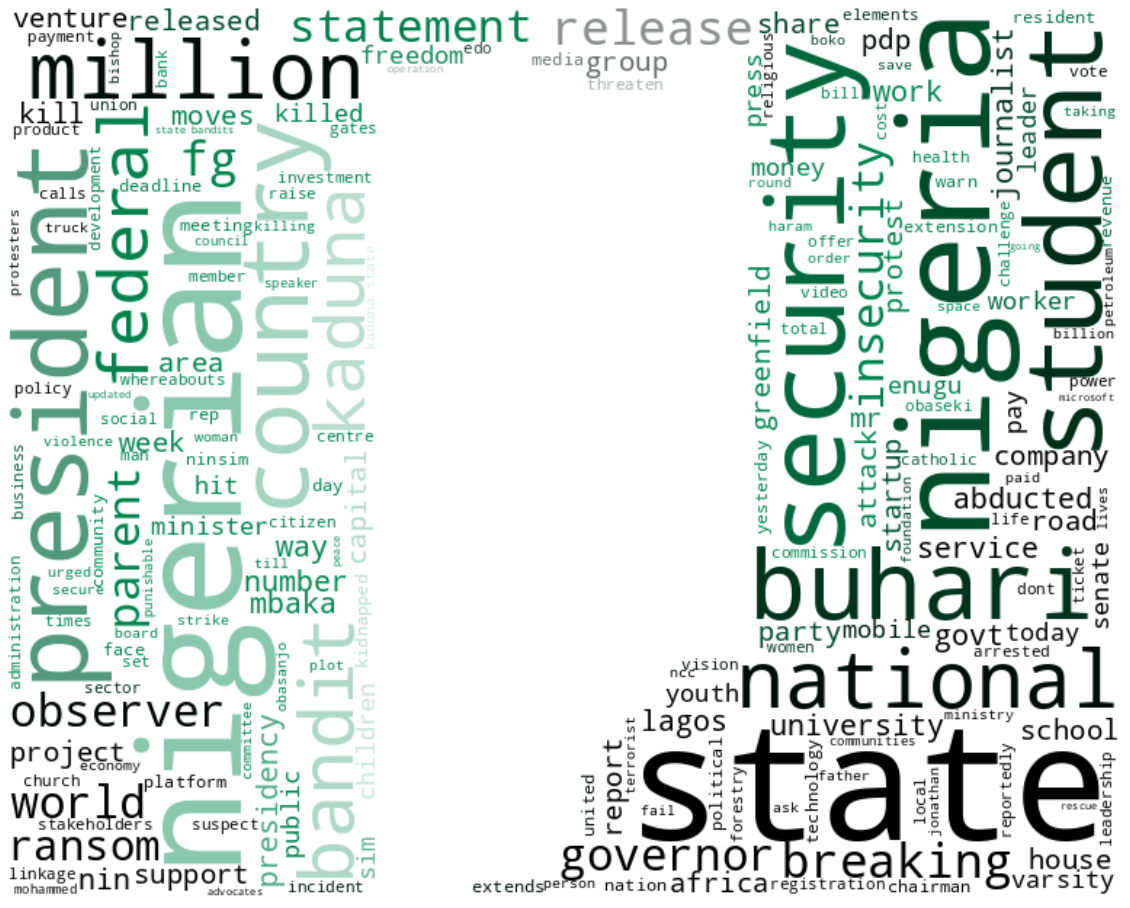

In [19]:
viz_word(all_time)
